### Course: MSCA 31009 Machine Learning & Predictive Analytics (Team Project)
    
### November 12, 2020

**Professor:** Arnab Bose

**Teaching Assistant:** Joshua Goldberg

**Grading Assistant:** John Navarro

**Team:** Serena Hanwen Xu, Adrienne Wang, Mike Thompson, Oleksiy Anokhin


In [ ]:
# Check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
# Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
# !pip install pycaret
# !pip install scikit-learn
# !pip install feature_selector

# Import general libraries and ML libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import pycaret
from pycaret.regression import *
from sklearn import linear_model
from scipy import stats
import xgboost as xgb
from scipy.stats import kurtosis
from scipy.stats import skew
import lightgbm as lgb 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

In [ ]:
# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

In [ ]:
# Connect to GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Setup the directory - PLEASE SELECT YOUR OWN ONE!
# Oleksiy's directory is %cd /content/drive/My Drive/Moneyball
%cd /content/drive/My Drive/Moneyball

/content/drive/My Drive/Moneyball


### **1. Import data**

In [ ]:
# Read data
df = pd.read_pickle('./ml_data.pkl')

In [ ]:
# Print top 5 rows
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Check shape
df.shape

(493475, 90)

### **2. Exploratory Data Analysis**

Here we create different subsest of features for different types of analysis. For example, we can select all numeric features (many of them are highly correlated) or only feautres without strong correlation. In addition, we can select only numeric, or categorical, or both. 

We worked a lot, exploring different features, but present only final selection here. 

#### **2-1. Select different lists of features**

In [ ]:
# Select all features as variable names (the target variable is not included)
all_features = ['PA_avg', 'AB_avg', 'SAC_avg', 'HBP_avg', 'BB_avg', 'S_avg', 
        'D_avg', 'T_avg', 'HR_avg', 'H_avg', 'TB_avg', 'SO_avg', 'RBI_avg', 'R_avg', 'CS_avg', 'SB_avg',
       'OBP_avg', 'SLG_avg', 'OPS_avg', 'OPS_Adj_avg', 'next_home', 'next_park_factor_SLG', 'next_park_factor_OBP',
       'pts_500', 'park_ratio_OBP', 'park_ratio_SLG', 'pts_500_parkadj',
       'SLG_avg_parkadj', 'OPS_avg_parkadj', 'whip_SO_B', 'whip_SO_B_parkadj',
       'IP_avg_p', 'PA_avg_p', 'AB_avg_p', 'SAC_avg_p', 'HBP_avg_p',
       'BB_avg_p', 'S_avg_p', 'D_avg_p', 'T_avg_p', 'HR_avg_p', 'H_avg_p',
       'TB_avg_p', 'SO_avg_p', 'RBI_avg_p', 'R_avg_p', 'CS_avg_p', 'SB_avg_p',
       'pts_500_p', 'OBP_avg_p', 'SLG_avg_p', 'OPS_avg_p', 'OPS_Adj_avg_p',
       'pts_500_parkadj_p', 'SLG_avg_parkadj_p', 'OPS_avg_parkadj_p',
       'whip_SO_parkadj_p', 'first_time_pitcher', 'order', 'ops x pts_500 order15',
       'ops x pts_500 parkadj', 'ops23 x pts_500', 'ops x pts_500 orderadj']

In [ ]:
# Select the most important, but highly correlated feaures (the target variable is not included)
# Selected by Mike, based on Random Forest feature importance
features = ['pts_500', 'pts_500_p', 'OBP_avg', 'SLG_avg', 'SB_avg', 'RBI_avg', 'R_avg', 'home', 
            'first_time_pitcher', 'park_ratio_OBP', 'park_ratio_SLG', 
            'SO_avg_p', 'pts_500_parkadj_p', 'pts_500_parkadj','SLG_avg_parkadj',
            'OPS_avg_parkadj','SLG_avg_parkadj_p',
            'OPS_avg_parkadj_p','pts_BxP','SLG_BxP','OPS_BxP','whip_SO_BxP','whip_SO_B','whip_SO_B_parkadj',
            'order', 'ops x pts_500 order15', 'ops x pts_500 parkadj', 'ops23 x pts_500', 'ops x pts_500 orderadj',
            'whip_p', 'whip_SO_p', 'whip_SO_parkadj_p', 'whip_parkadj_p']

In [ ]:
# Select features for PyCaret analysis (tthe target variable is included)
# In this subset we selected only 13 the most important features with the correlation below 0.8 or -0.8. 
pycaret_features = ['pts_500_p', 'OBP_avg', 'SLG_avg', 'SB_avg', 
                    'RBI_avg', 'R_avg', 'home', 
                    'first_time_pitcher', 'park_ratio_SLG', 
                    'whip_SO_B_parkadj',
                    'order', 'ops x pts_500 orderadj',
                    'whip_p', 'pts']

In [ ]:
# Select the most important, but not highly correlated feaures (the target variable is not included)
# Target variable not included here
key_features = ['pts_500_p', 'OBP_avg', 'pts_500_parkadj', 'SB_avg', 
                    'RBI_avg', 'R_avg', 'home', 
                    'first_time_pitcher', 'park_ratio_SLG', 
                    'whip_SO_B_parkadj',
                    'order', 'ops x pts_500 orderadj',
                    'whip_p']

In [ ]:
# Print types of columns
df.dtypes

game                              object
start                     datetime64[ns]
home                               int64
team                              object
opp                               object
id                                object
inning                             int64
event                             object
park                              object
park_factor_SLG                  float64
park_factor_OBP                  float64
PA_avg                           float64
AB_avg                           float64
SAC_avg                          float64
HBP_avg                          float64
BB_avg                           float64
S_avg                            float64
D_avg                            float64
T_avg                            float64
HR_avg                           float64
H_avg                            float64
TB_avg                           float64
SO_avg                           float64
RBI_avg                          float64
R_avg           

In [ ]:
# Check NaNs
df.isnull().sum(axis = 0)
# No NaN data

game                      0
start                     0
home                      0
team                      0
opp                       0
id                        0
inning                    0
event                     0
park                      0
park_factor_SLG           0
park_factor_OBP           0
PA_avg                    0
AB_avg                    0
SAC_avg                   0
HBP_avg                   0
BB_avg                    0
S_avg                     0
D_avg                     0
T_avg                     0
HR_avg                    0
H_avg                     0
TB_avg                    0
SO_avg                    0
RBI_avg                   0
R_avg                     0
CS_avg                    0
SB_avg                    0
park_factor_SLG_avg       0
park_factor_OBP_avg       0
OBP_avg                   0
SLG_avg                   0
OPS_avg                   0
OPS_Adj_avg               0
idx                       0
maxidx                    0
next_game           

In [ ]:
# Check correlation
cor = df[features].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.7) | (cor < -0.7)]
# As we can see, we have a lot of very correlated features

OBP_avg                 pts_500                  0.725029
SLG_avg                 pts_500                  0.923857
RBI_avg                 pts_500                  0.746241
                        SLG_avg                  0.747114
R_avg                   pts_500                  0.788957
park_ratio_SLG          park_ratio_OBP           0.872047
SO_avg_p                pts_500_p                0.889306
pts_500_parkadj_p       pts_500_p                0.994341
                        SO_avg_p                 0.885615
pts_500_parkadj         pts_500                  0.966056
                        OBP_avg                  0.700422
                        SLG_avg                  0.892213
                        RBI_avg                  0.721091
                        R_avg                    0.761370
SLG_avg_parkadj         pts_500                  0.895991
                        SLG_avg                  0.969906
                        RBI_avg                  0.724867
              

#### **2-2. Plot data**

And plot transformed data. It will allow us to see the distribution of our target variable. 

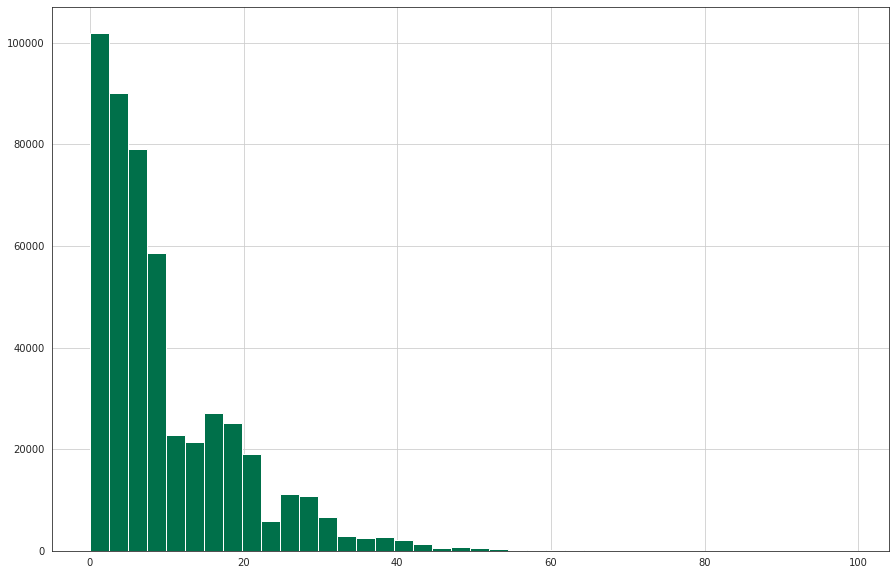

In [ ]:
# Plot histogram of points
df.pts.hist(bins = 40, color = '#00704A')
# As we can see, our histogram is positively skewed

In [ ]:
# Calculate skewness and kurtosis
print("skew:", skew(df.pts))
print("kurt:", kurtosis(df.pts))

skew: 1.4789645443498782
kurt: 2.6505286746959147


In [ ]:
# Convert pts, using Box-Cox transformation
# Create a copy
df_sr = df.copy()
df_sr.pts = np.sqrt(df_sr.pts)

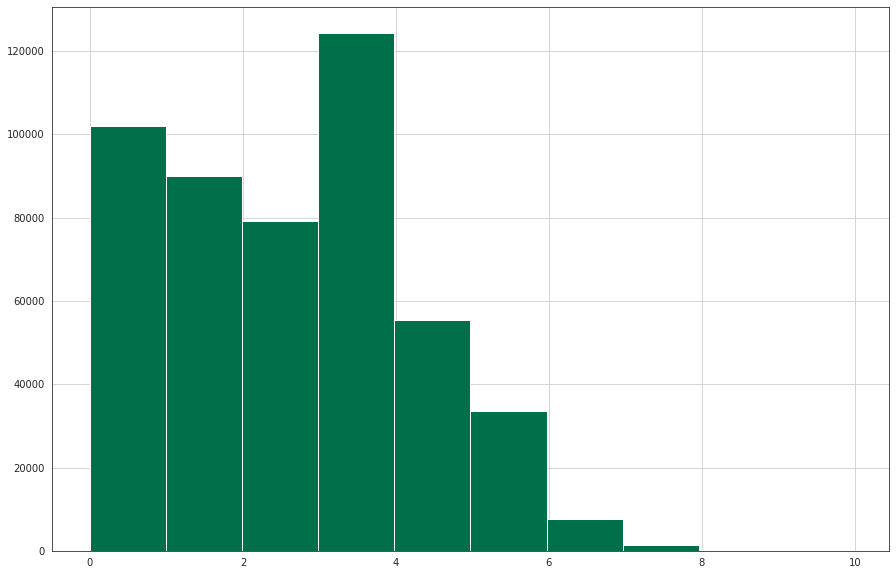

In [ ]:
# Plot histogram of points after Box-Cox transformation.
df_sr.pts.hist(bins = 10, color = '#00704A')
# As we can see, our histogram is still positively skewed

In [ ]:
# Calculate skewness and kurtosis
print("skew:", skew(df_sr.pts))
print("kurt:", kurtosis(df_sr.pts))

skew: 0.06659780751123172
kurt: -0.5948612545950169


### **3. Exploratory modelling with PyCaret**

Before creating models with Sckit-learn, we did the exploratory modelling analysis. For this purposes we used **[PyCaret](https://pycaret.org/about/)**. 

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

**PyCaret has own advantages and disadvantages**

Advantages: 

- Easy to work with
- High level overview of multiple regression models and comparison of results
- Ideas for further exploration (accuracy vs time)

Disadvantages: 

- Blackbox solution
- No options to check underfitting/overfitting

In [ ]:
# Select features and create a dataframe for PyCaret analysis
pycaret_df = df[pycaret_features]

In [ ]:
# Print shape
pycaret_df.shape

(493475, 14)

In [ ]:
# Print dataframe
pycaret_df.head()

,pts_500_p,OBP_avg,SLG_avg,SB_avg,RBI_avg,R_avg,home,first_time_pitcher,park_ratio_SLG,whip_SO_B_parkadj,order,ops x pts_500 orderadj,whip_p,pts
0,5568.5,0.259669,0.328313,0.027624,0.080110,0.127072,1,0,1.014082,-0.030815,7.0,497.316820,1.378472,12.2
1,5382.6,0.263587,0.332344,0.027174,0.078804,0.127717,1,0,0.946193,-0.028283,8.0,390.976092,1.317362,0.0
2,5430.1,0.262032,0.338192,0.026738,0.080214,0.128342,1,0,0.961674,-0.035999,7.0,442.466506,1.267492,0.0
3,4656.9,0.261214,0.336207,0.026385,0.079156,0.126649,1,0,1.014547,-0.040154,7.0,445.829441,1.076843,3.5
4,5309.2,0.259740,0.342776,0.025974,0.083117,0.127273,0,0,1.020770,-0.047724,7.0,502.787262,1.321471,6.5


In [ ]:
# Create a basic PyCaret instance
# !pip install pycaret
# Due to importance of this analysis, I will import these libraries here too, because we need to install PyCaret every time. 
import pycaret
from pycaret.regression import *
df_pycaret = setup(data = pycaret_df, target = 'pts', train_size = 0.8, session_id = 123)

,Description,Value
0,session_id,123
1,Target,pts
2,Original Data,"(493475, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(394780, 13)"


In [ ]:
# Compare regression models in PyCaret
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7.236400e+00,8.869590e+01,9.417800e+00,2.740000e-02,1.2094,7.900000e-01,46.103
lightgbm,Light Gradient Boosting Machine,7.236300e+00,8.870710e+01,9.418400e+00,2.730000e-02,1.2091,7.900000e-01,1.420
br,Bayesian Ridge,7.244600e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.147
lr,Linear Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.386
catboost,CatBoost Regressor,7.241400e+00,8.890920e+01,9.429100e+00,2.510000e-02,1.2090,7.911000e-01,30.715
lar,Least Angle Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.065
ridge,Ridge Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.054
xgboost,Extreme Gradient Boosting,7.247700e+00,8.909050e+01,9.438700e+00,2.310000e-02,1.2089,7.919000e-01,24.627
omp,Orthogonal Matching Pursuit,7.283700e+00,8.985380e+01,9.479100e+00,1.470000e-02,1.2157,7.938000e-01,0.063
en,Elastic Net,7.281900e+00,8.997980e+01,9.485700e+00,1.330000e-02,1.2180,7.921000e-01,0.144


As you can see, PyCaret allowed us to compare 19 different regression models.
The advantage of this exploratory modelling is the following:

- we can see which models predict well and explore them with `scikit-learn`
- we can compare the results of key metrics and the speed of calcualtion

For instance, we can see that our Ramdom Forest model does not perform well and is the slowest model in our current situation. As a resul, it does not make sense to focus on this model. Instead we can work additionally with some PyCaret models independently.

We will select:

- **Boosting (Gradient Boosting, Light Gradient Boosting Machine)**
- **Regression (Linear, Rigde)**

Boosting algorithms are the best in terms of results, but regressions are also very good and much faster.

Besides, we can see already that PyCaret gives us better results than our baseline benchmark below. Our `MAE` and `RMSE` scores are higher.

![](https://i.ibb.co/31fbdnY/image.png)

### **4. Feature selection**

In this section we did feature selection, using Gradient Boosting Regression.

In [ ]:
# Drop some columns
df_important = df.copy()
df_important = df_important.drop(['game', 'start', 'id', 'team', 'opp', 'id', 'event', 'next_team', 'next_opp', 'idx', 'maxidx', 'next_game'], axis = 1)

In [ ]:
# Print the intial dataframe again
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Print df
df_important.head()

,home,inning,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,1,5,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,1,9,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,1,8,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,1,8,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,0,5,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.995673,1.015561,0.259740,0.342776,0.602516,0.810309,0.0,1.016353,0.998417,7.0,6.5,1.999481,0.983119,1.020770,2.041010,0.349896,0.615031,-0.046753,-0.047724,571.3330,2422.0,2122.0,48.0,25.0,227.0,335.0,119.0,12.0,62.0,528.0,857.0,485.0,242.0,276.0,18.0,42.0,1.321471,0.472579,5309.2,780.0,857.0,1637.0,2261.0,5592.650009,902.753910,1724.396908,0.497809,1.392022,2008,0,3519.510835,502.787262,293.496704,219.198977,11414.652978,315.869677,1060.557080,-0.023758


In [ ]:
# Create dummy variables
df_important = pd.get_dummies(df_important, columns = ['park'], drop_first = False, prefix = ['park'])

In [ ]:
# Print df with dummy variables
df_important.head()

,home,inning,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP,park_ANA,park_ARI,park_ATL,park_BAL,park_BOS,park_CHA,park_CHN,park_CIN,park_CLE,park_COL,park_DET,park_FLO,park_HOU,park_KCA,park_LAN,park_MIA,park_MIL,park_MIN,park_NYA,park_NYN,park_OAK,park_PHI,park_PIT,park_SDN,park_SEA,park_SFN,park_SLN,park_TBA,park_TEX,park_TOR,park_WAS
0,1,5,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,8,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.29090

In [ ]:
# Print types
df_important.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_factor_SLG      float64
next_park_factor_OBP      float64
order         

In [ ]:
# Convert strings to integers
df_important.iloc[:, 78:] = df_important.iloc[:, 78:].astype('int')

In [ ]:
# Print 
df_important.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_factor_SLG      float64
next_park_factor_OBP      float64
order         

In [ ]:
# Split data
X = df_important.drop('pts', axis = 1)
y = df_important[['pts']]

In [ ]:
# Split X and y into training and testing sets
# 0.8 for training and 0.2 for testing one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
col_names = X_train.columns

In [ ]:
# Create an instance
GBR2 = GradientBoostingRegressor()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR2.fit(X_train, y_train)

# Predict y_pred
y_pred = GBR2.predict(X_test)

In [ ]:
# Select top 10 features
gb_importances = GBR2.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]
gb_importance_column_list=[]
gb_importance_lt=[]
for f in range(X_train.shape[1]):
    gb_importance_column_list.append(X.columns[gb_indices[f]])
    gb_importance_lt.append(gb_importances[gb_indices[f]])

Text(0.5, 1.0, 'Feature Importance - top10 from Gradient Boosting')

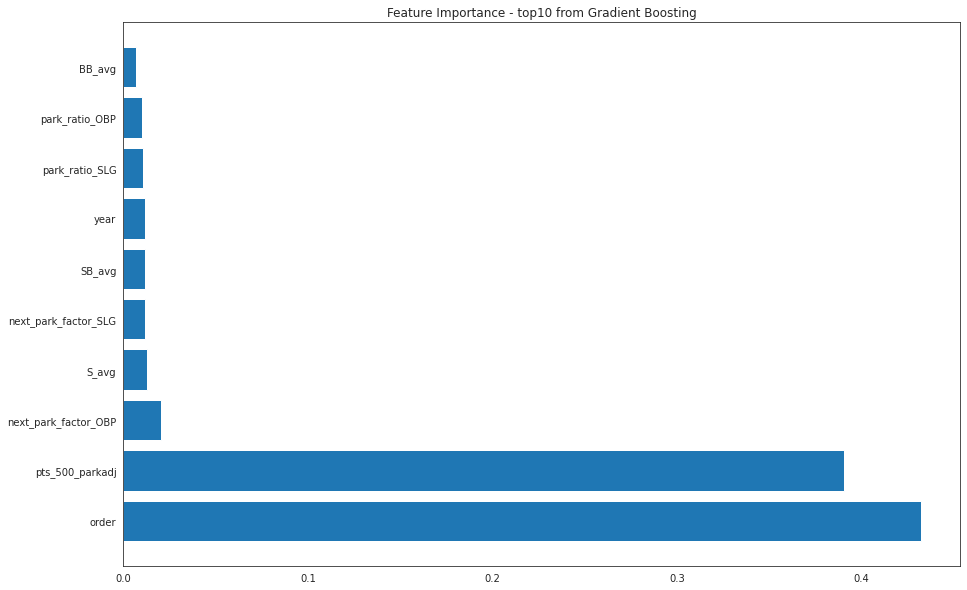

In [ ]:
# Plot top 10 features
# feature_importance10 = gb_importance_lt[:10]
# feature_top10 = gb_importance_column_list[:10]
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(10), gb_importance_lt[0:10], align = 'center')
plt.yticks(range(10), gb_importance_column_list[:10])
plt.title('Feature Importance - top10 from Gradient Boosting')

Text(0.5, 1.0, 'Feature Importance - top20 from Gradient Boosting')

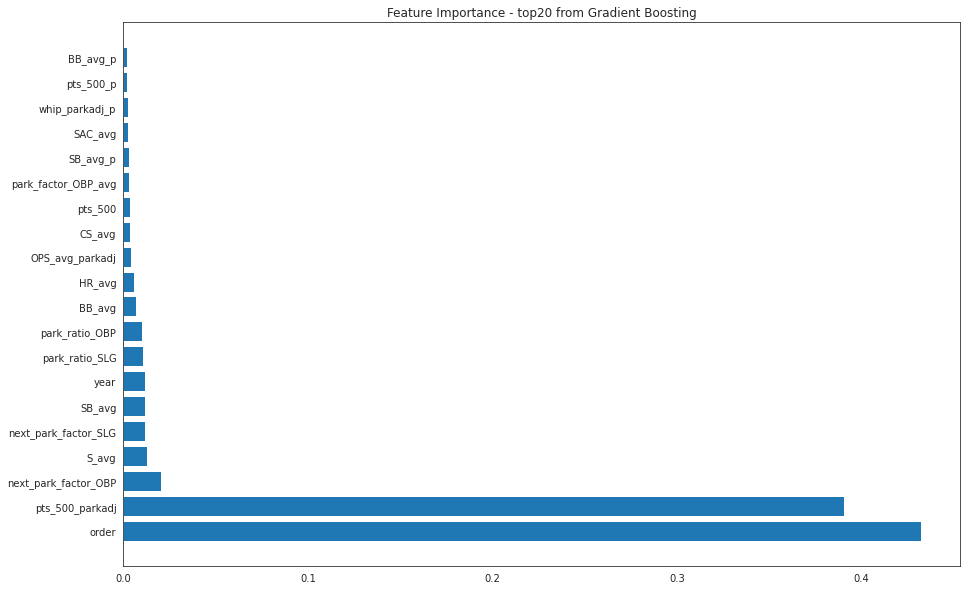

In [ ]:
# Plot top 20 features
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(20), gb_importance_lt[0:20], align = 'center')
plt.yticks(range(20), gb_importance_column_list[:20])
plt.title('Feature Importance - top20 from Gradient Boosting')

Text(0.5, 1.0, 'Feature Importance - top30 from Gradient Boosting')

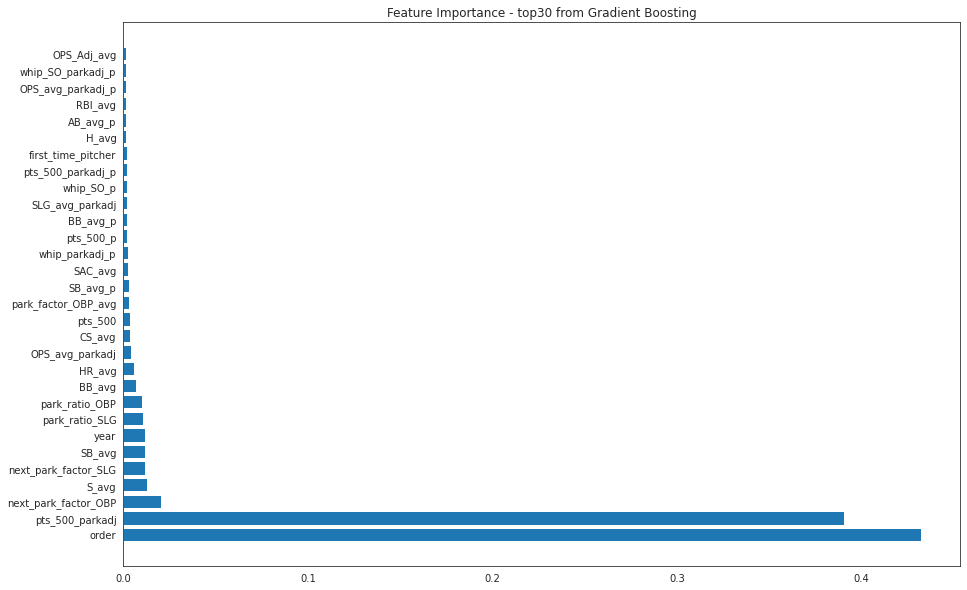

In [ ]:
# Plot top 30 features
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(30), gb_importance_lt[0:30], align = 'center')
plt.yticks(range(30), gb_importance_column_list[:30])
plt.title('Feature Importance - top30 from Gradient Boosting')

### **5. Modelling with scikit-learn**

In this part we used `scikit-learn` for our selected features with modified data (below).

In [ ]:
# Get ratio_x = ts_x_parkadji/pts_1000_parkadj for 500, 250 and 100 
df100sub = df100[['pts_500_parkadj']]
df250sub = df250[['pts_500_parkadj']]
df500sub = df500[['pts_500_parkadj']]
df1000sub = df1000[['game', 'year', 'next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg',
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg', 'pts_500_parkadj', 'pts']]
df100sub = df100sub.rename(columns={"pts_500_parkadj": "pts_100_parkadj"})
df250sub = df250sub.rename(columns={"pts_500_parkadj": "pts_250_parkadj"})
df500sub= df500sub.rename(columns={"pts_500_parkadj": "pts_500_parkadj"})
df1000sub= df1000sub.rename(columns={"pts_500_parkadj": "pts_1000_parkadj"})

# Merge dfs
df = pd.concat([df1000sub, df100sub, df250sub, df500sub], axis = 1)
for i in [100, 250, 500]:
  df['ratio_'+str(i)] = df['pts_'+str(i)+'_parkadj']/df['pts_1000_parkadj']
df = df.drop(['game', 'pts_100_parkadj', 'pts_250_parkadj', 'pts_500_parkadj'], axis=1)

In [ ]:
# Print the dataframe
df.head()

,year,next_order,park_ratio_SLG,next_park_factor_OBP,S_avg,SB_avg,pts_500,BB_avg,HR_avg,CS_avg,pts_1000_parkadj,pts,ratio_100,ratio_250,ratio_500
0,2008,8.0,1.014082,0.983534,0.394737,0.087719,6.234211,0.175439,0.061404,0.052632,6.322002,12.2,0.817150,0.871796,1.0
1,2008,7.0,0.946193,0.955035,0.396552,0.086207,6.257759,0.172414,0.060345,0.051724,5.921049,0.0,0.792854,0.849562,1.0
2,2008,7.0,0.961674,0.993667,0.383333,0.083333,6.205000,0.166667,0.066667,0.050000,5.967189,0.0,0.845191,0.849228,1.0
3,2008,7.0,1.014547,0.983534,0.382114,0.081301,6.078049,0.162602,0.065041,0.048780,6.166466,3.5,0.876347,0.835956,1.0
4,2008,1.0,1.020770,0.998417,0.373016,0.079365,6.109524,0.158730,0.071429,0.047619,6.236419,6.5,0.951794,0.844955,1.0


In [ ]:
# Remove NANs
df.isna().sum()
df1 = df.dropna()
df.shape

(493475, 15)

#### **5-1. GBR**

In [ ]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
GBR = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR.fit(X_train, y_train)

# Predict y_pred
y_pred = GBR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.163121  7.527636   9.886543
2018      0.172930  7.319181   9.518879
2019      0.177433  7.704088  10.092732
Total     0.171540  7.516337   9.834708


In [ ]:
# Calculate R-squared for GBR model
print(0.163121**2)
print(0.172930**2)
print(0.177433**2)
print(0.171540**2)

0.026608460640999997
0.029904784900000002
0.031482469489
0.0294259716


#### **5-2. LGBM**

In [ ]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
LGBM = LG(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
LGBM.fit(X_train, y_train)

# Predict y_pred
y_pred = LGBM.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.162066  7.527609   9.888953
2018      0.172128  7.320112   9.520341
2019      0.179138  7.698073  10.090480
Total     0.171480  7.514649   9.835227


In [ ]:
# Calculate R-squared for LGBM model
print(0.162066**2)
print(0.172128**2)
print(0.179138**2)
print(0.171480**2)

0.026265388355999997
0.029628048384000003
0.032090423044
0.0294053904


#### **5-3. Linear Regression**

In [ ]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
LR = LinearRegression()

# Fit the model (subset of data)
LR.fit(X_train, y_train)

# Predict y_pred
y_pred = LR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.157609  7.553237   9.893539
2018      0.170995  7.343817   9.522620
2019      0.177407  7.724806  10.090295
Total     0.169141  7.539999   9.837445


In [ ]:
# Calculate R-squared for LR model
print(0.157609**2)
print(0.170995**2)
print(0.177407**2)
print(0.169141**2)

0.024840596880999998
0.029239290025000003
0.031473243649000004
0.028608677881000005


#### **5-4. Ridge Regression**

In [ ]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
RR = Ridge()

# Fit the model (subset of data)
RR.fit(X_train, y_train)

# Predict y_pred
y_pred = RR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.157613  7.553214   9.893535
2018      0.170995  7.343793   9.522619
2019      0.177405  7.724800  10.090304
Total     0.169141  7.539982   9.837446


In [ ]:
# Calculate R-squared for RR model
print(0.157613**2)
print(0.170995**2)
print(0.177405**2)
print(0.169141**2)

0.024841857769
0.029239290025000003
0.031472534025000005
0.028608677881000005


### **6. Conclusion**

As you can see, our models in `scikit-learn` outperformed our baseline target from the paper. 

![](https://i.ibb.co/3FgnG3r/image.png)

### **7. Additional comments**

Working on ML models, we use different types of feauture engineering. We mention them below. 

- Feature selection (options with different variables)
- Different sizes of datasets
- Scaling of data
- Analysis of transformed data
- Grid Search (too slow) and Random Search (no significant improvement)